# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [35]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [36]:
# We bring the dataset from the web
from sklearn import datasets

iris = datasets.load_iris()

# Importing data

In [37]:

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Define the col names for the iris dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


# Dataset url


# Load the dataset from HHDD


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


2. Drop rows with any missing values


In [40]:
df= df.dropna()
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


3. Encoding the class label categorical column: from string to num


In [41]:

df['species_encoded'] = pd.Categorical.from_codes(iris.target, iris.target_names)


# Mapping
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

#Visualize the dataset
print(df)


     sepal_length  sepal_width  petal_length  petal_width  species  \
0             5.1          3.5           1.4          0.2        0   
1             4.9          3.0           1.4          0.2        0   
2             4.7          3.2           1.3          0.2        0   
3             4.6          3.1           1.5          0.2        0   
4             5.0          3.6           1.4          0.2        0   
..            ...          ...           ...          ...      ...   
145           6.7          3.0           5.2          2.3        2   
146           6.3          2.5           5.0          1.9        2   
147           6.5          3.0           5.2          2.0        2   
148           6.2          3.4           5.4          2.3        2   
149           5.9          3.0           5.1          1.8        2   

    species_encoded  
0            setosa  
1            setosa  
2            setosa  
3            setosa  
4            setosa  
..              ...  
145  

Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns
#Not necesary


5. Scatter plot of the data

<ipython-input-70-091a59c435e4>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['petal_length'], df['petal_width'], c="blue", cmap='viridis', edgecolor='k', s=100)
<ipython-input-70-091a59c435e4>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['petal_width'], df['petal_length'], c="blue", cmap='viridis', edgecolor='k', s=100)
<ipython-input-70-091a59c435e4>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['sepal_length'], df['sepal_width'], c="blue", cmap='viridis', edgecolor='k', s=100)
<ipython-input-70-091a59c435e4>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['sepal_width'], df['sepal_length'], c="blue", cmap='viridis', edgecolor='k', s=100)
<ipython-input-70-091a59c435e4>:6: UserWarning: No data for colormapping provided via 'c'. Param

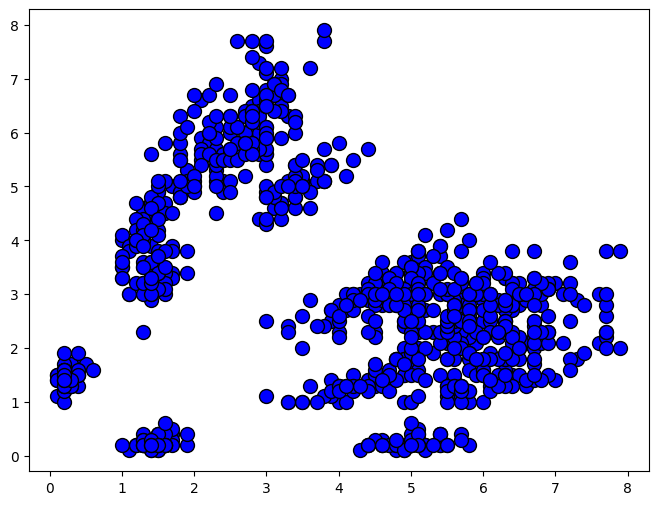

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(df['petal_length'], df['petal_width'], c="blue", cmap='viridis', edgecolor='k', s=100)
plt.scatter(df['petal_width'], df['petal_length'], c="blue", cmap='viridis', edgecolor='k', s=100)
plt.scatter(df['sepal_length'], df['sepal_width'], c="blue", cmap='viridis', edgecolor='k', s=100)
plt.scatter(df['sepal_width'], df['sepal_length'], c="blue", cmap='viridis', edgecolor='k', s=100)
plt.scatter(df['petal_length'], df['sepal_width'], c="blue", cmap='viridis', edgecolor='k', s=100)
plt.scatter(df['sepal_length'], df['petal_width'], c="blue", cmap='viridis', edgecolor='k', s=100)

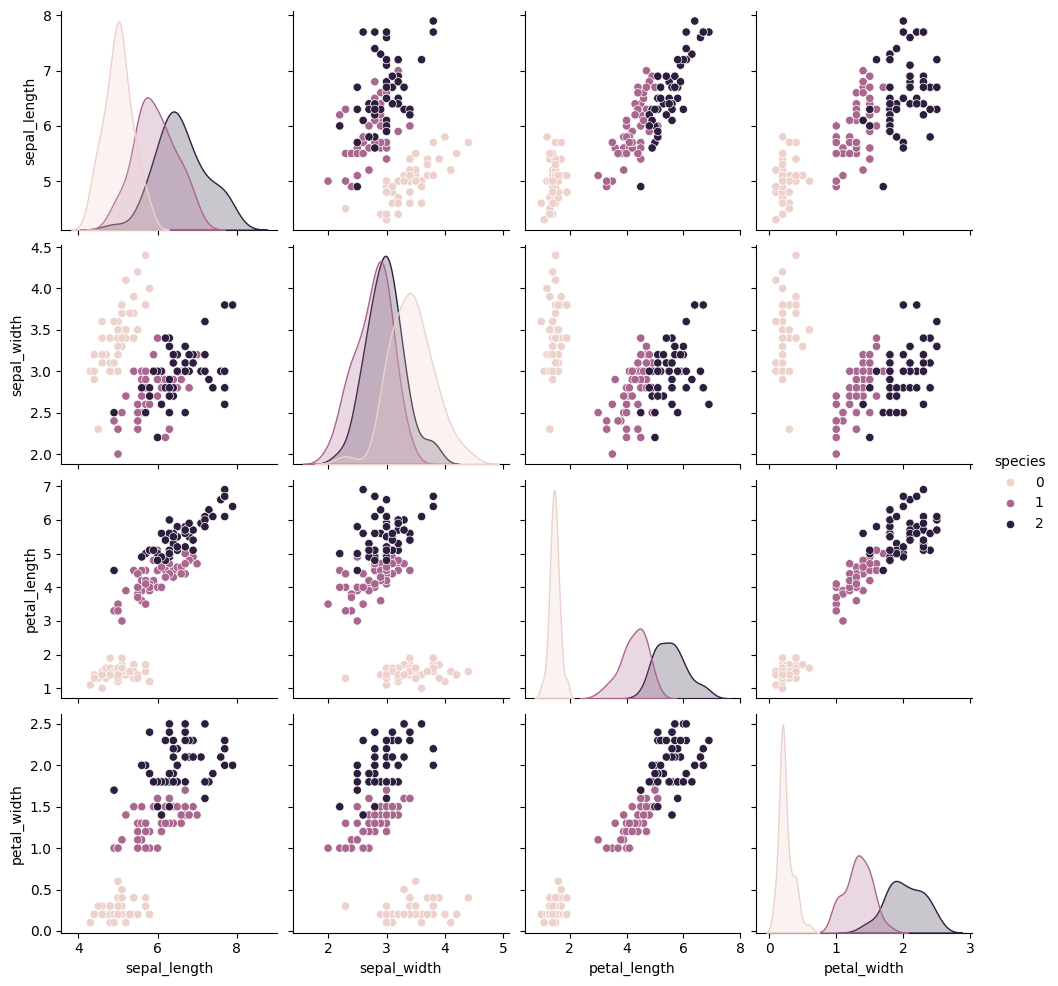

In [48]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df, hue='species')

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

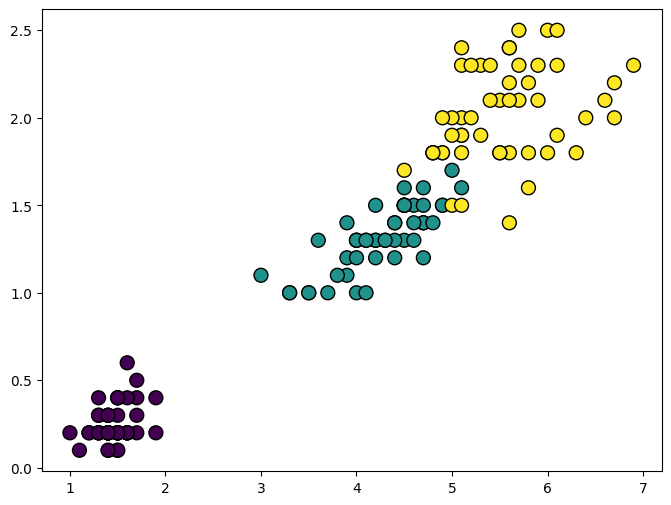

In [44]:
# Get dataframes for each real cluster

plt.figure(figsize=(8,6))
plt.scatter(df['petal_length'], df['petal_width'], c=iris.target, cmap='viridis', edgecolor='k', s=100)

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [51]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
import numpy as np

# Define number of clusters
num_clusters = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Print estimated cluster of each point in the dataset
clusters = kmeans.predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [52]:
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [54]:
# Manual pairing the labels of the real and estimated clusters
df['cluster'] = clusters
df['cluster_2'] = df['cluster'].replace({0:1, 1:0, 2:2})
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species  \
0             5.1          3.5           1.4          0.2        0   
1             4.9          3.0           1.4          0.2        0   
2             4.7          3.2           1.3          0.2        0   
3             4.6          3.1           1.5          0.2        0   
4             5.0          3.6           1.4          0.2        0   
..            ...          ...           ...          ...      ...   
145           6.7          3.0           5.2          2.3        2   
146           6.3          2.5           5.0          1.9        2   
147           6.5          3.0           5.2          2.0        2   
148           6.2          3.4           5.4          2.3        2   
149           5.9          3.0           5.1          1.8        2   

    species_encoded  cluster  cluster_2  
0            setosa        1          0  
1            setosa        1          0  
2            setosa        1     

In [ ]:
# Add a new column to the dataset with the cluster information
# Already above
df['cluster'] = clusters

In [59]:
# Label of the estimated clusters
# Already above
df['cluster_2'] = df['cluster'].replace({0:1, 1:0, 2:2})

In [55]:
# Cluster centroides
centroids = kmeans.cluster_centers_

# Print the centroids
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [57]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print("Sum of Squared Errors (SSE):", sse)

Sum of Squared Errors (SSE): 78.85566582597727


In [58]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print("Number of iterations to converge:", iterations)

Number of iterations to converge: 11


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

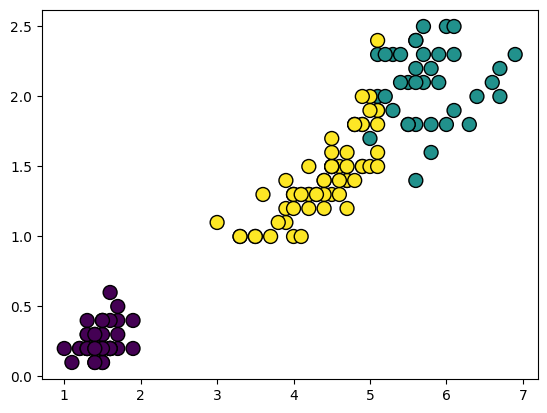

In [61]:
plt.scatter(df['petal_length'], df['petal_width'], c=df["cluster_2"], cmap='viridis', edgecolor='k', s=100)

## Plot both real and estimated clusters to check for errors

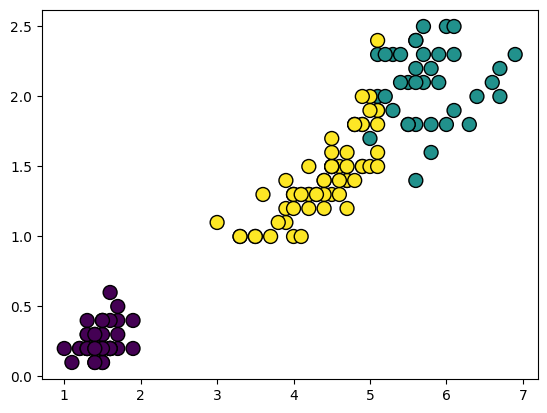

In [62]:

plt.scatter(df['petal_length'], df['petal_width'], c=df["cluster_2"], cmap='viridis', edgecolor='k', s=100)

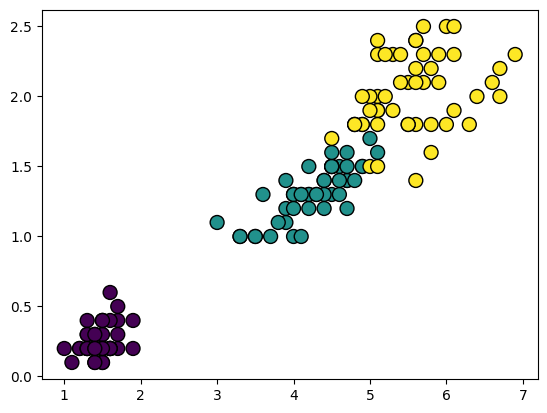

In [63]:
plt.scatter(df['petal_length'], df['petal_width'], c=iris.target, cmap='viridis', edgecolor='k', s=100)

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [68]:

# Initialize a list to hold SSE values
sse = []

# Define values of k
k_values = range(1, 11)

# For each k
for k in k_values:
    # Perform K-means clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

    # Append the SSE (inertia) for this k
    sse.append(kmeans.inertia_)




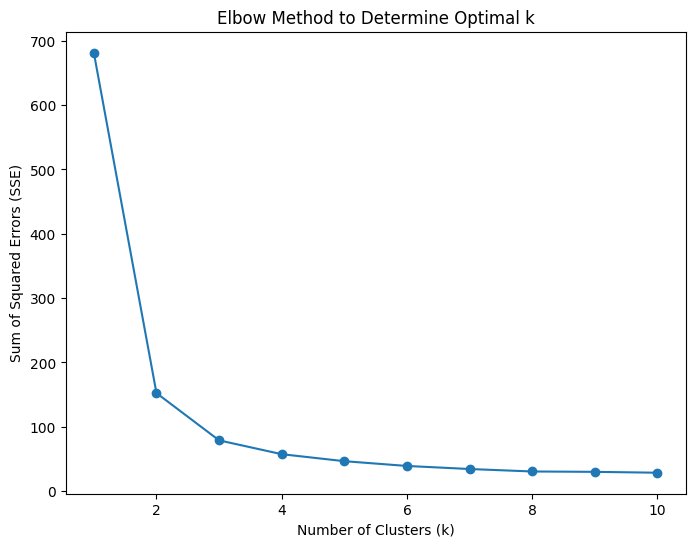

In [69]:
# Plot sse versus k
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

In [ ]:
#The k chosen is 3 because it is there were the error is after minimally reduced